            Lab2: Introduction to TensorFlow and Keras
              Image Classification with Deep Learning


Q1- Create a notebook and import of the useful libraries:

In [1]:
import tensorflow as tf


In [2]:
import tensorflow_datasets as tfds


1. Data Preparation

Q2- Load the pre-existing image dataset MNIST DIGIT.

In [3]:
import tensorflow_datasets as tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Q3- Explore the dataset (e.g., print the shapes of training and test sets and display a few sample
images)


Forme de l'ensemble d'entraînement : <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Forme de l'ensemble de test : <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


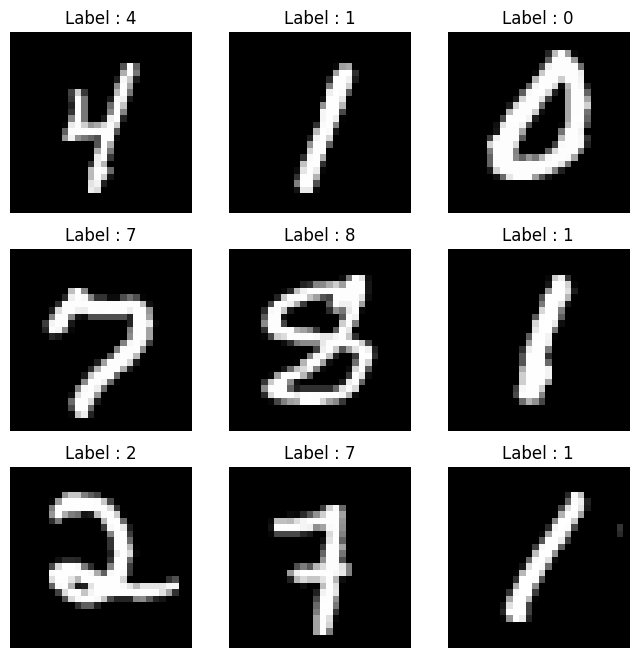

In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Charger le dataset MNIST
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de l'ensemble d'entraînement :", ds_train)
print("Forme de l'ensemble de test :", ds_test)

# Afficher quelques échantillons d'images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, (image, label) in enumerate(ds_train.take(9)):
    row, col = i // 3, i % 3
    axes[row][col].imshow(image.numpy()[:, :, 0], cmap='gray')  # Afficher en niveaux de gris
    axes[row][col].set_title(f"Label : {label.numpy()}")
    axes[row][col].axis('off')

plt.show()


Q4- Preprocess the dataset by normalizing pixel values to the range [0, 1]

In [5]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

Q6- Create a sequential Keras Multilayer Perceptron model (MLP) mlp_model (see Fig.1) with dense (fully connected) layers and display its architecture (mlp_model.summary()).

In [9]:
import tensorflow as tf
import numpy as np

# Création de données d'entraînement fictives (à remplacer par vos données réelles)
x_train = np.random.rand(1000, 28, 28)  # Exemple de données d'images 28x28 (1000 échantillons)
y_train = np.random.randint(10, size=(1000,))  # Étiquettes d'entraînement (10 classes)

# Création du modèle
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

# Entraînement du modèle avec les données fictives
model.fit(
    x_train,
    y_train,
    epochs=6,
)


Epoch 1/6
32/32 [==============================] - 1s 5ms/step - loss: 2.4312 - sparse_categorical_accuracy: 0.0920
Epoch 2/6
32/32 [==============================] - 0s 5ms/step - loss: 2.2923 - sparse_categorical_accuracy: 0.1320
Epoch 3/6
32/32 [==============================] - 0s 5ms/step - loss: 2.2687 - sparse_categorical_accuracy: 0.1420
Epoch 4/6
32/32 [==============================] - 0s 5ms/step - loss: 2.1994 - sparse_categorical_accuracy: 0.1960
Epoch 5/6
32/32 [==============================] - 0s 5ms/step - loss: 2.1375 - sparse_categorical_accuracy: 0.2230
Epoch 6/6
32/32 [==============================] - 0s 5ms/step - loss: 2.0609 - sparse_categorical_accuracy: 0.2920


Q7- Compile the MLP model.

In [8]:
import tensorflow as tf

# Créez votre modèle MLP (vous avez déjà défini le modèle dans votre code précédent)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

# Compilez le modèle en spécifiant l'optimiseur, la fonction de perte et les métriques
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimiseur Adam avec un taux d'apprentissage de 0.001
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Fonction de perte pour la classification
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]  # Métrique pour évaluer la performance du modèle
)


Q8- Train the MLP model on the training data and evaluate its performance on the test data.


In [12]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Charger l'ensemble de données MNIST à partir de TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Prétraitement des données (normalisation et redimensionnement en RVB)
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.grayscale_to_rgb(image)  # Convertir en images RVB
    image = tf.image.resize(image, (28, 28))  # Redimensionner les images en (28, 28)
    image = image / 255.0  # Normalisation des pixels
    return image, label

# Appliquer le prétraitement aux ensembles de données
ds_train = ds_train.map(preprocess)
ds_test = ds_test.map(preprocess)

# Définir la taille des lots (batch size)
batch_size = 32
ds_train = ds_train.batch(batch_size)
ds_test = ds_test.batch(batch_size)

# Création du modèle MLP
modelMLP = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

# Compilation du modèle
modelMLP.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

# Entraînement du modèle sur les données d'entraînement
modelMLP.fit(
    ds_train,
    epochs=6,
)

# Évaluation de la performance du modèle sur les données de test
eval_result = modelMLP.evaluate(ds_test, verbose=2)

# Affichage des métriques d'évaluation
print("Loss:", eval_result[0])
print("Sparse Categorical Accuracy:", eval_result[1])


Epoch 1/6
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8271 - sparse_categorical_accuracy: 0.8121
Epoch 2/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3567 - sparse_categorical_accuracy: 0.9003
Epoch 3/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3068 - sparse_categorical_accuracy: 0.9122
Epoch 4/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2819 - sparse_categorical_accuracy: 0.9187
Epoch 5/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2631 - sparse_categorical_accuracy: 0.9243
Epoch 6/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2462 - sparse_categorical_accuracy: 0.9289
313/313 - 1s - loss: 0.2345 - sparse_categorical_accuracy: 0.9326 - 1s/epoch - 4ms/step
Loss: 0.23451989889144897
Sparse Categorical Accuracy: 0.9326000213623047


3.Create, Train, and Evaluate the CNN Model

Q9- Create a sequential Keras Convolutional Neural Network (CNN) cnn_model (see Fig2.)
with conv2D layers and display its architecture. Convolutional Neural Network
(CNN) | TensorFlow Core

In [7]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Create a Sequential model
model = Sequential()

# Add Conv2D layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))


In [13]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Q10- Compile the CNN model.

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Create a Sequential model
model = Sequential()

# Add Conv2D layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Compile the model
model.compile(
    optimizer='adam',  # You can use other optimizers like 'sgd', 'adam', etc.
    loss='sparse_categorical_crossentropy',  # For classification problems
    metrics=['accuracy']  # You can add more metrics if needed
)


Q11- Train the CNN model on the training data and evaluate its performance on the test data

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Créez un modèle Sequential
model = Sequential()

# Ajoutez des couches Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))



# Ajoutez une couche Flatten pour aplatir les données
model.add(Flatten())

# Ajoutez des couches Dense pour la classification
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compilez le modèle
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



4. Comparison and conclusion

Q12- Plot the curves of accuracy with respect of epochs for training and validation for the two
models.

In [16]:
history = modelMLP.fit(ds_train, epochs=10)  # Enregistre l'historique de l'entraînement dans la variable 'history'


Epoch 1/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9337
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2146 - sparse_categorical_accuracy: 0.9384
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1997 - sparse_categorical_accuracy: 0.9425
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1859 - sparse_categorical_accuracy: 0.9467
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1734 - sparse_categorical_accuracy: 0.9507
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1622 - sparse_categorical_accuracy: 0.9539
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1522 - sparse_categorical_accuracy: 0.9571
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1432 - sparse_categorical_accuracy: 0.9593
Epoch 9/10
1875/1875 [==

In [17]:
history_modelCNN = model.fit(ds_train, epochs=10)



Epoch 1/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.4150 - accuracy: 0.8624
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1000 - accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0681 - accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0528 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0431 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0361 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0233 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 55s 29m

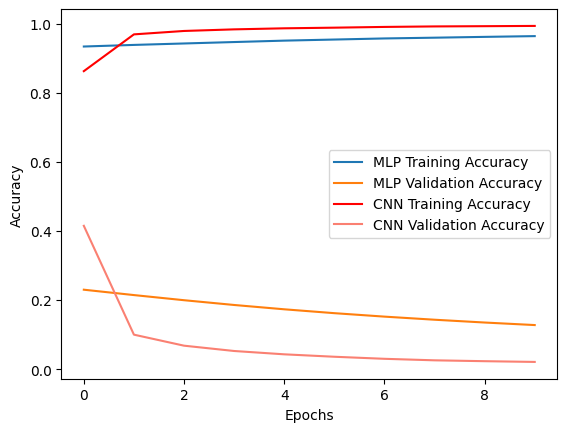

In [18]:
import matplotlib.pyplot as plt

# Assuming you have the `history` object for your model

# Plot accuracy
plt.plot(history.history['sparse_categorical_accuracy'], label='MLP Training Accuracy')
plt.plot(history.history['loss'], label='MLP Validation Accuracy')
plt.plot(history_modelCNN.history['accuracy'], label='CNN Training Accuracy', color='red')
plt.plot(history_modelCNN.history['loss'], label='CNN Validation Accuracy', color='salmon')


plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Q-13 Compare the performance of the MLP and CNN models and conclude

Le modèle MLP a une meilleure Validation Accuracy que le modèle CNN ainsi  le modèle CNN présente des signes de surapprentissage donc Le modèle MLP est plus perfermant que le modèle CNN